<a href="https://colab.research.google.com/github/AbrahamB2603/IAyRN/blob/Main/Tester1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de la clase Inteligencia Artificial y Redes Neuronales.
# Ramiro Emiliano Martinez De La Cruz - 2014197 - Martes M4
# María Fernanda Garza Barbosa - 1945003 - Martes N4
# Karla Judith Corona Castro - 1923390 - Martes N4
# Abraham Giovanni Aguirre Bravo - 2014222 - Martes N4


# Introducción

Este proyecto se hizo con la finalidad de brindar apoyo a las personas que presentan alguna discapacidad del habla, facilitando su interacción con quienes no comparten sus mismas formas de comunicación. La idea es desarrollar una herramienta que interprete el lenguaje de señas mexicano, permitiendo que los gestos realizados por los usuarios puedan ser reconocidos y traducidos ya sea en acciones concretas o en mensajes hablados o escritos que reflejen sus pensamientos y emociones.

Este enfoque busca reducir la barrera comunicativa entre quienes utilizan lenguaje de señas y quienes no lo comprenden, promoviendo así una comunicación más fluida, inclusiva y accesible para ambas partes. Para lograrlo, se emplearán servomotores y una cámara de video, elementos clave que permitirán captar e interpretar los movimientos de las manos con precisión, haciendo posible la implementación de este sistema.

#Librerias

In [5]:
# importar librerías
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os

#Preprocesamiento

In [26]:
# Google Drive en Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
# Verificar el contenido
ruta_dataset = "/content/drive/MyDrive/Datasets/Dataset"

# Listar las carpetas dentro de "Dataset"
carpetas = os.listdir(ruta_dataset)
print("Carpetas dentro de Dataset:", carpetas)

Carpetas dentro de Dataset: ['4', '3', '5', '6', '7', '8', '9', '2', '0', '1']


In [29]:
# Cargar imágenes desde la carpeta Dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    ruta_dataset,
    image_size=(224, 224),  # Tamaño de imagen
    batch_size=32,          # Tamaño de lote
    shuffle=True            # Mezclar imágenes
)

# Ver clases detectadas (las carpetas 1-9)
print("Clases detectadas:", dataset.class_names)

Found 2062 files belonging to 10 classes.
Clases detectadas: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


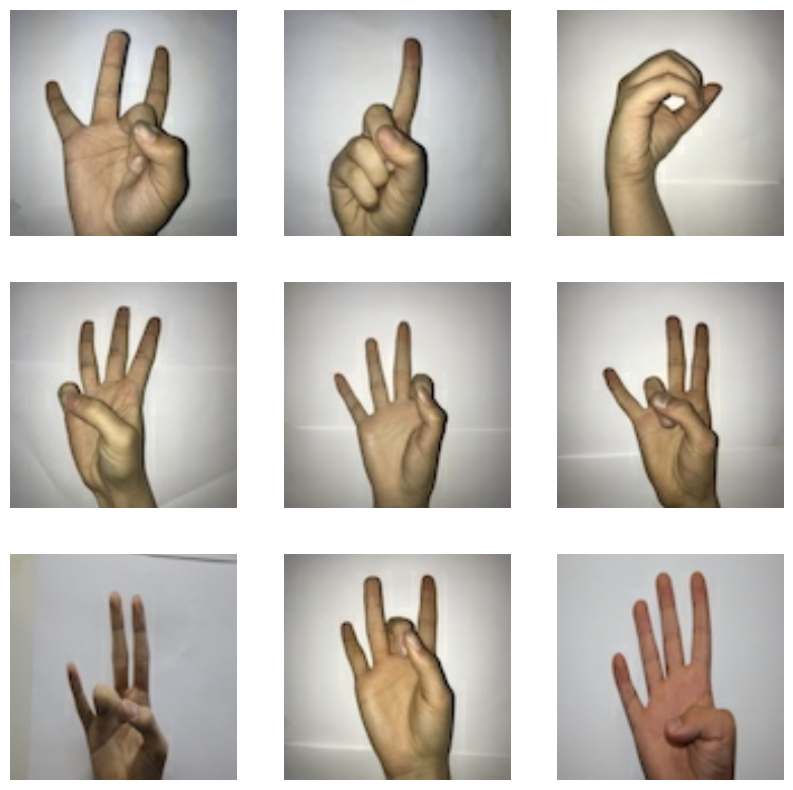

In [30]:
# Visualizar algunas imágenes
imagenes, etiquetas = next(iter(dataset))

# Mostrar las primeras 9 imágenes
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(imagenes[i].numpy().astype("uint8"))
    plt.axis("off")
plt.show()


In [ ]:
# Formato de imagen
img_resized = cv2.resize(test_image, (28,28), )
img_resized = cv2.bitwise_not(img_resized)

# Preview de imagen reformateada
Numeros='/content/Numeros'
plt.imshow(img_resized, cmap='gray')
plt.savefig("/content/Numeros/abc.png")
# Numeros.download("abc.png")

# Dentro del ciclo for, vamos a generar las ETIQUETAS para cada imagen (enteros del 0 - 9).
img_resized.append()

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
# Dividir el dataset en 80% para entrenamiento y 20% para validación, o 70% - 30%.
# ¡Invesigar!

train_images
train_labels
test_images
test_labels

In [ ]:
# Preprocesamiento: visualización de variables y normalización de imagenes.
train_images.shape

In [ ]:
len(train_labels)

In [ ]:
train_labels

In [ ]:
test_images.shape

In [ ]:
len(test_labels)

In [ ]:
# Normalización de valores de pixeles.

train_images = train_images / 255.0
test_images = test_images / 255.0

#Estructura y entrenamiento de Red Neuronal Artificial Convolusional (RNAC)

In [ ]:
# Parte convolusional de la RNAC

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
# Parte de clasificación
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10), activation = 'softmax')

In [ ]:
# Compliación del modelo: características
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                            metrics=['accuracy'])

In [ ]:
# Entrenamiento de la RNAC
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

#Resultados de exactitud de la RNAC

In [ ]:
#Gráfica con la diferencia de valores de exactitud del entrenamiento y la validación.

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.xlim([-1, 11])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

#Predicciones con la RNAC entrenada

In [ ]:
predictions = model.predict(test_images_generadasporustedes)

In [ ]:
x = predictions[1]
y = test_labels[1]
print("La red dice que la imagen es clase " + x + "y la clase verdadera es: " + y)

In [ ]:
x = predictions[50]
y = test_labels[50]
print("La red dice que la imagen es clase " + x + "y la clase verdadera es: " + y)

In [ ]:
x = predictions[40]
y = test_labels[40]
print("La red dice que la imagen es clase " + x + "y la clase verdadera es: " + y)